In [96]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path

In [97]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-12__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "bpmin", "l"],
          descending=[False, False, False]
        )
)

print(df_sorted)

shape: (4, 40)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_bind_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ null         ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ null        ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 150 ┆ 30  ┆ … ┆ null         ┆ null        ┆ 0.993025    ┆ 1.003917    │
│ 2         ┆ homogeneous ┆ 150 ┆ 30  ┆ … ┆ null         ┆ null        ┆ 0.993025    ┆ 1.003917    │
│ 2         ┆ homogeneous ┆ 150 ┆ 30  ┆ … ┆ null         ┆ null        ┆ 1.004996    ┆ 0.992102    │
│ 2         ┆ homogeneous ┆ 150 ┆ 30  ┆ … ┆ null         ┆ null        ┆ 1.0

In [98]:
# The first line of the polar data frame

results_0 = df_sorted["results"][0].to_numpy()
# print(results_0)

t_matrix_0 = df_sorted["t_matrix"][0]. to_numpy()
# print(t_matrix_0)

x_matrix_0 = df_sorted["x_matrix"][0]. to_numpy()
print(x_matrix_0)

[array([   0.,  135.,  135.,  259.,  259.,  370.,  370.,  479.,  479.,
         557.,  557.,  661.,  661.,  724.,  724.,  811.,  811.,  903.,
         903., 1002., 1002., 1107., 1107., 1235., 1235., 1310., 1310.,
        1412., 1412., 1493., 1493., 1576., 1576., 1675., 1675., 1769.,
        1769., 1883., 1883., 1978., 1978., 2043., 2043., 2162., 2162.,
        2266., 2266., 2368., 2368., 2514., 2514., 2610., 2610., 2707.,
        2707., 2816., 2816., 2927., 2927., 3028., 3028., 3128., 3128.,
        3251., 3251., 3338., 3338., 3473., 3473., 3578., 3578., 3679.,
        3679., 3778., 3778., 3887., 3887., 3984., 3984., 4108., 4108.,
        4239., 4239., 4358., 4358., 4465., 4465., 4541., 4541., 4661.,
        4661., 4776., 4776., 4889., 4889., 4967., 4967., 5061., 5061.,
        5180., 5180., 5282., 5282., 5372., 5372., 5460., 5460., 5570.,
        5570., 5710., 5710., 5776., 5776., 5862., 5862., 5960., 5960.,
        6056., 6056., 6191., 6191., 6285., 6285., 6417., 6417., 6511.,
      

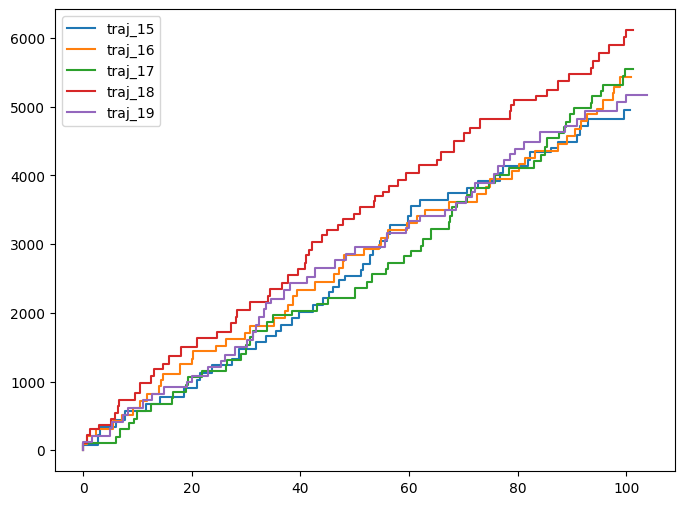

In [99]:
plt.figure(figsize=(8,6))
for i in range(15,20):
    plt.step(t_matrix_0[i], x_matrix_0[i], label=f"traj_{i}")
plt.legend()
plt.show()